In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import LOM
from sklearn.cross_validation import train_test_split

In [2]:
fname = "synthetic_control.data"
content = [line.strip() for line in open(fname)]
data = []
for c in content:
    data.append(np.array(c.split(' ')))
    newData = []
lens = []
for d in data:
    a = []
    for i,j in enumerate(d):
        if d[i] != '':
            a.append(float(d[i]))
    newData.append(a)
data = pd.DataFrame(newData)

In [3]:
converted = data.transpose()
normalized = (converted - converted.mean())/(converted.max() - converted.min())
normalizedData = normalized.transpose()

### Experiment 1:
 - Classify single time series 
 - We try to classify one time series as one vs all 

In [4]:
def getClassification(k = 'IT'):
    classifier = {
        'N': 100,
        'C': 200,
        'IT':300,
        'DT':400,
        'US':500,
        'DS':600
    }
    A = np.ones(600)*-1
    A[classifier[k]-100:classifier[k]] = 1
    return A

In [67]:
### Try to find increasing Trend

In [5]:
normalizedData['Result'] = getClassification()
normalizedData = normalizedData.sample(frac=1)

In [6]:
from sklearn.cross_validation import train_test_split
Y_train, Y_test, L_train, L_test = train_test_split(normalizedData[normalizedData.columns[0:60]], normalizedData['Result'], test_size=0.4, random_state=0)

 /m/home/home8/81/nautiys1/unix/jupyter/venv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.


In [7]:
C = 1
N = 60
S = Y_train.shape[0]
myModel = LOM.LOM(Y=Y_train.as_matrix(),L=L_train.values,N=N,C=1,S=S)

In [15]:
Y_train.shape[1]

60

In [8]:
myModel.fit(n=60,P=2,iters=500,kernels=[])

Concatenated Latent Gaussian Processes:
(120, 120) (120, 120) 0 50 100 150 200 250 300 350 400 450


In [9]:
result = myModel.predict(Ytest=Y_test.values) 

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(result[0],L_test.values)

0.79583333333333328

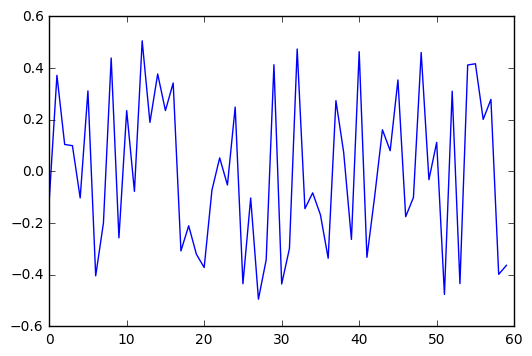

In [11]:
plt.plot(normalizedData.ix[0][0:60])

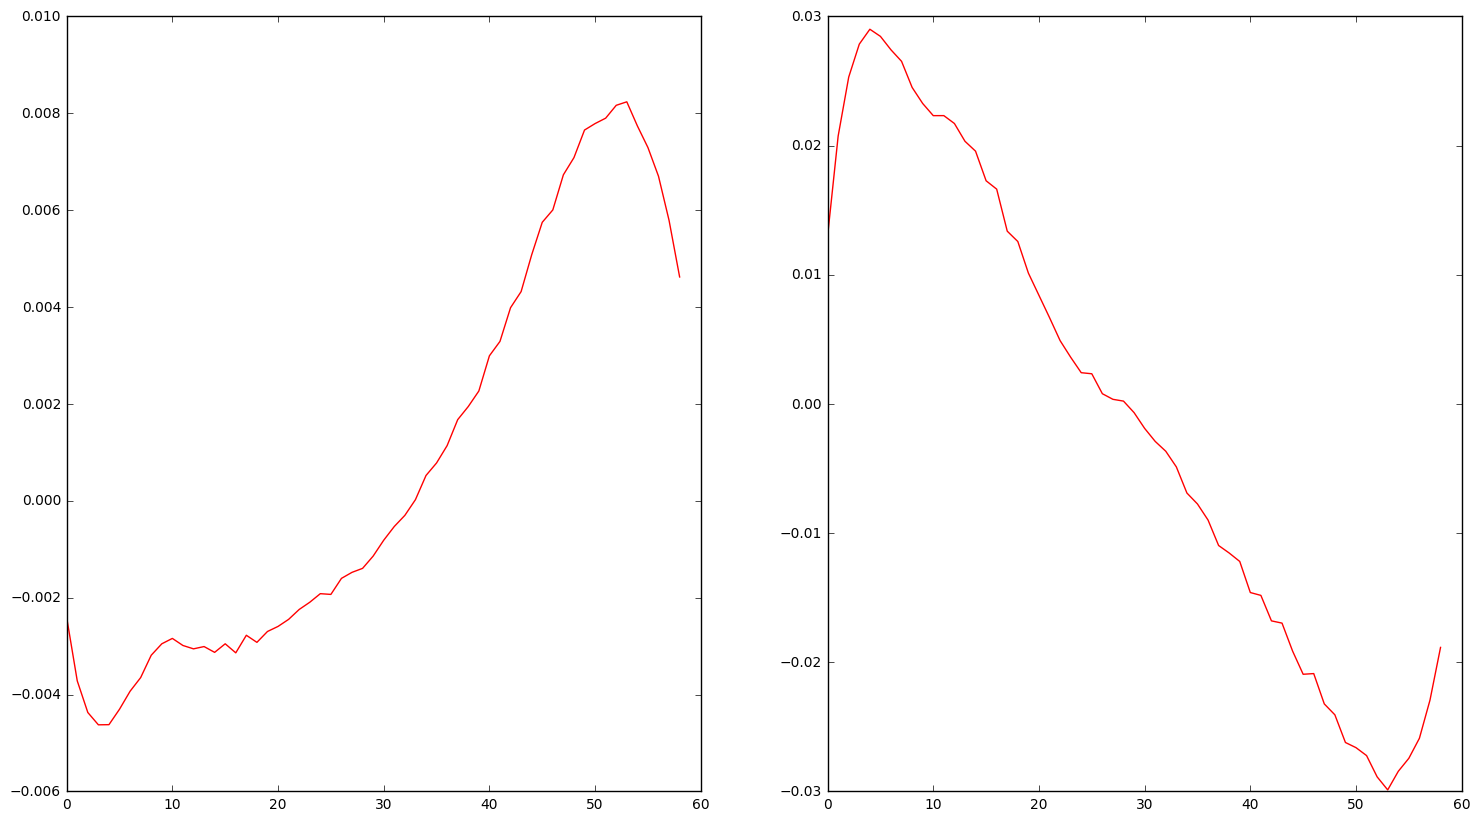

In [12]:
fig,axes = plt.subplots(nrows=1,ncols=myModel.P,figsize=(18,10))
for p in range(myModel.P):
    axes[p].plot(myModel.uExpBar[0,p*N:p*N+N-1].T,c='r')

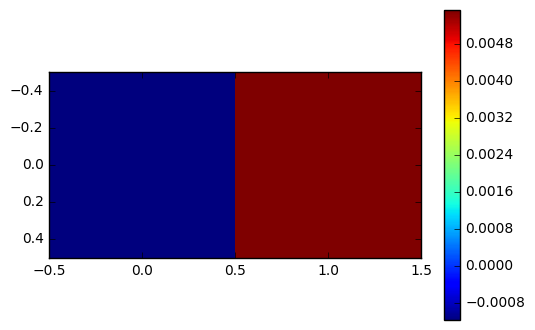

In [13]:
plt.imshow(myModel.phiHatExp,interpolation="none")
plt.colorbar()

In [152]:
myModel.uExpBar[250].shape

(1, 300)